In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
!unzip /content/drive/MyDrive/deeplearning/datafordoan.zip -d .

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: ./datafordemo/test/bike/022.jpg  
  inflating: ./datafordemo/test/bike/023.jpg  
  inflating: ./datafordemo/test/bike/024.jpg  
  inflating: ./datafordemo/test/bike/025.jpg  
  inflating: ./datafordemo/test/bike/026.jpg  
  inflating: ./datafordemo/test/bike/027.jpg  
  inflating: ./datafordemo/test/bike/028.jpg  
  inflating: ./datafordemo/test/bike/029.jpg  
  inflating: ./datafordemo/test/bike/030.jpg  
  inflating: ./datafordemo/test/bike/031.jpg  
  inflating: ./datafordemo/test/bike/032.jpg  
  inflating: ./datafordemo/test/bike/033.jpg  
  inflating: ./datafordemo/test/bike/034.jpg  
  inflating: ./datafordemo/test/bike/035.jpg  
  inflating: ./datafordemo/test/bike/036.jpg  
  inflating: ./datafordemo/test/bike/037.jpg  
  inflating: ./datafordemo/test/bike/038.jpg  
  inflating: ./datafordemo/test/bike/039.jpg  
  inflating: ./datafordemo/test/bike/040.jpg  
  inflating: ./datafordemo/test/bike/041.jpg  
  i

In [ ]:
# Đường dẫn dữ liệu
BASE_PATH = "/content/datafordemo"
TRAIN_PATH = os.path.join(BASE_PATH, "train")
VALID_PATH = os.path.join(BASE_PATH, "valid")
TEST_PATH = os.path.join(BASE_PATH, "test")
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
# Tạo các data generator cho tập huấn luyện, tập validation và tập test
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALID_PATH,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3502 images belonging to 5 classes.
Found 1001 images belonging to 5 classes.
Found 502 images belonging to 5 classes.


In [ ]:
# Tải mô hình DenseNet121 được đào tạo trước từ thư viện Keras
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
# Đóng băng các layers của mô hình DenseNet121
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Xây dựng mô hình trên mô hình cơ sở DenseNet121
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile mô hình
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Huấn luyện mô hình
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/30
109/109 [==============================] - 93s 702ms/step - loss: 0.1810 - accuracy: 0.9366 - val_loss: 0.0568 - val_accuracy: 0.9859
Epoch 2/30
109/109 [==============================] - 66s 603ms/step - loss: 0.0869 - accuracy: 0.9700 - val_loss: 0.1188 - val_accuracy: 0.9708
Epoch 3/30
109/109 [==============================] - 65s 599ms/step - loss: 0.0528 - accuracy: 0.9821 - val_loss: 0.0599 - val_accuracy: 0.9849
Epoch 4/30
109/109 [==============================] - 65s 589ms/step - loss: 0.0592 - accuracy: 0.9787 - val_loss: 0.0680 - val_accuracy: 0.9829
Epoch 5/30
109/109 [==============================] - 63s 580ms/step - loss: 0.0640 - accuracy: 0.9778 - val_loss: 0.0752 - val_accuracy: 0.9819
Epoch 6/30
109/109 [==============================] - 64s 589ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.0448 - val_accuracy: 0.9899
Epoch 7/30
109/109 [==============================] - 68s 624ms/step - loss: 0.0441 - accuracy: 0.9850 - val_loss: 0.0413 - val_ac

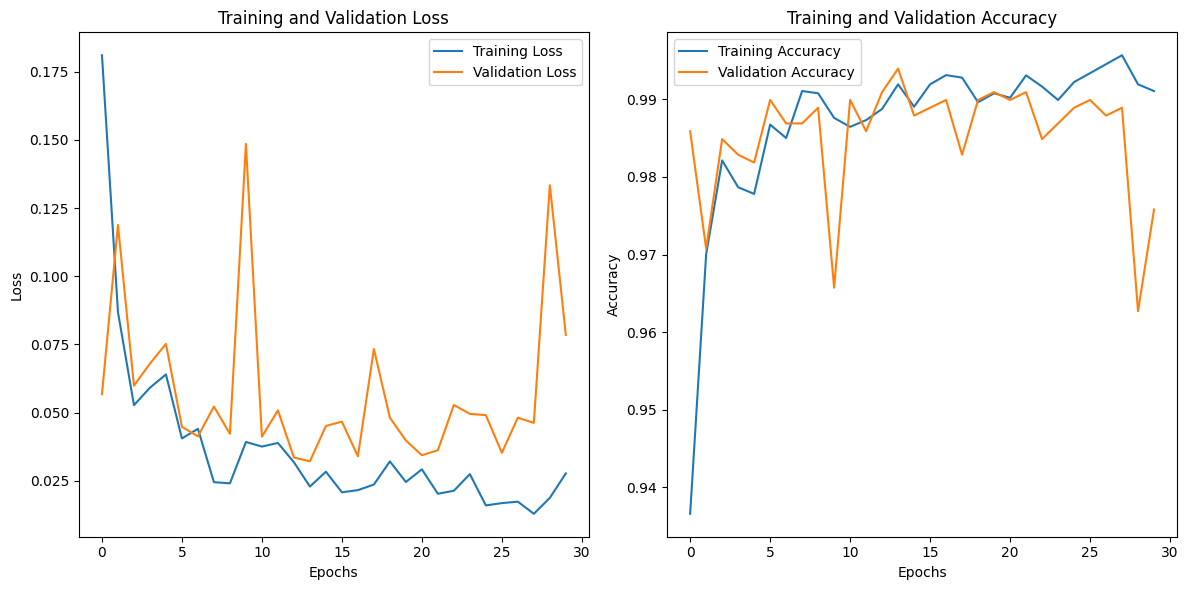

In [ ]:
# Vẽ biểu đồ huấn luyện
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.3f}")

16/16 [==============================] - 9s 587ms/step - loss: 0.1257 - accuracy: 0.9761
Test accuracy: 0.976


In [ ]:
# Đường dẫn đến file để lưu mô hình
model_save_path = "/content/drive/MyDrive/deeplearning/model"
model.save(model_save_path)